In [38]:
import pandas as pd
import numpy as np
import re
import random
from sklearn.model_selection import train_test_split
"""
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
"""

"\nimport nltk\nnltk.download('wordnet')\nnltk.download('averaged_perceptron_tagger')\nfrom nltk.corpus import wordnet\nfrom nltk.stem import WordNetLemmatizer\n"

In [39]:
# chargement des données
steam = pd.read_csv('archive/steam.csv')
steam_description_data = pd.read_csv('archive/steam_description_data.csv')

# on ne devrait pas avoir besoin de celles-ci
'''
steam_media_data = pd.read_csv('steam_media_data.csv')
steam_requirements_data = pd.read_csv('steam_requirements_data.csv')
steam_support_info = pd.read_csv('steam_support_info.csv')
steamspy_tag_data = pd.read_csv('steamspy_tag_data.csv')
'''

# fonction pour afficher les informations d'un fichier
# si dimensions_type = True, les types des dimensions sont également affichés
def info(file, *dimensions_type):
    dataset_panda = pd.read_csv(file)
    print('*****'+file+'*****\n'+'Nombre de donnée: ', dataset_panda.shape[0],'\nNombre de dimension: ',
          dataset_panda.shape[1],'\n')
    if(dimensions_type):
        print('Types des dimensions:\n', dataset_panda.dtypes)

In [40]:
info('archive/steam.csv', True)
steam

*****archive/steam.csv*****
Nombre de donnée:  27075 
Nombre de dimension:  18 

Types des dimensions:
 appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [41]:
info('archive/steam_description_data.csv', True)
steam_description_data

*****archive/steam_description_data.csv*****
Nombre de donnée:  27334 
Nombre de dimension:  4 

Types des dimensions:
 steam_appid              int64
detailed_description    object
about_the_game          object
short_description       object
dtype: object


,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...
...,...,...,...,...
27329,1065230,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The Room of Pandora is a third-person interact...
27330,1065570,Have you ever been so lonely that no one but y...,Have you ever been so lonely that no one but y...,Cyber Gun is a hardcore first-person shooter w...
27331,1065650,<strong>Super Star Blast </strong>is a space b...,<strong>Super Star Blast </strong>is a space b...,Super Star Blast is a space based game with ch...
27332,1066700,Pursue a snow-white deer through an enchanted ...,Pursue a snow-white deer through an enchanted ...,Pursue a snow-white deer through an enchanted ...


## Preprocessing

In [42]:
# On récupère les valeurs de la colonne steam_appid du fichier steam.csv
steam_id = steam[steam.columns[0]].values
# On récupère toutes les valeurs de toutes les colonnes du fichier steam_description_data.csv
description = steam_description_data[steam_description_data.columns].values
# On récupère les titres des jeux
# titles = steam[steam.columns[1]].values

features = []
# Le fichier steam_description_data.csv contient plus de jeux que steam.csv, on ne récupère que ceux qu'ils ont en commun

# j = 0
for i in range(len(description)):
    if(description[i,0] in steam_id):
        # pour ajouter les titres des jeux
        #d = [titles[j]]
        #d = np.append(d, description[i, 1:])
        # j += 1
        
        # pour n'utiliser que les descriptions
        features.append(description[i, 1:])
        

# On récupère les données
X = np.array(features)
# On récupère les labels
label = steam.columns[9] # la colonne 9 correspond au genre du jeu
y = steam[label].values

In [43]:
print('X: ',X.shape,'\ny: ',y.shape)

X:  (27075, 3) 
y:  (27075,)


In [44]:
'''
X[0,0]: detailed_description
X[0,1]: about_the_game
X[0,2]: short_description
'''
# 1er jeu du fichier steam.csv
print('1er jeu du dataset:\n',X[0])
# son label
print('\nLabel: ',y[0])

1er jeu du dataset:
 ["Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role."
 "Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role."
 "Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role."]

Label:  Action


In [45]:
# exemple d'un jeu dont la description est en chinois?
X[24881] 

array(['《魔塔2018》是一种策略类的RPG游戏。游戏需要动很多脑筋，任何一个轻率的选择都可能导致游戏的失败。<br />\r\n<br />\r\n魔塔制作精美，道具很多，而且有一定难度，对智商是一次艰巨的考验。<br />\r\n<br />\r\n所以如果你喜欢挑战，请一定不要错过!魔塔是一款十分经典的游戏,身为勇士的你必须闯过一层又一层的魔塔 最后到达塔顶 救回你那美丽的公主,魔塔里到处都充满着凶残的怪物，我们必须杀死他们。',
       '《魔塔2018》是一种策略类的RPG游戏。游戏需要动很多脑筋，任何一个轻率的选择都可能导致游戏的失败。<br />\r\n<br />\r\n魔塔制作精美，道具很多，而且有一定难度，对智商是一次艰巨的考验。<br />\r\n<br />\r\n所以如果你喜欢挑战，请一定不要错过!魔塔是一款十分经典的游戏,身为勇士的你必须闯过一层又一层的魔塔 最后到达塔顶 救回你那美丽的公主,魔塔里到处都充满着凶残的怪物，我们必须杀死他们。',
       '这是一款策略类的RPG游戏，通过你的判断与计算和怪物战斗，打败他们救出公主，赢得胜利。'], dtype=object)

### Fonctions

In [46]:
def delete_no_english(X, y):
    steam_langage = steam[steam.columns[3]].values
    cpt = 0
    new_X = []
    new_y = []
    N = X.shape[0]
    for i in range(N):
        # si le jeu n'est pas en anglais
        if(steam_langage[i] == 1):
            new_X.append(X[i])
            new_y.append(y[i])
        else:
            cpt += 1
    print(cpt," jeux ont été enlevés\n")
    return np.array(new_X), np.array(new_y)

def html(s):
    split = s.split('<')
    # on le split à nouveau avec la balise fermante
    s_without_HTML = ""
    # supprimer html
    for i in range(len(split)):
        split[i] = split[i].split('>')
        if(i == 0):
            s_without_HTML += split[i][0]
        elif(len(split[i]) > 1 and split[i][1] != ""):
            if(split[i][1][0] == " "):
                s_without_HTML += split[i][1]
            else:
                s_without_HTML += " " + split[i][1]
    return s_without_HTML

def replace(s, new_values):
    N = len(new_values)
    for i in range(N):
        s = s.replace(new_values[i][0], new_values[i][1])
    return s

def brackets(s):
    brackets = np.array([['(', ')'], ['[', ']'], ['{', '}']])
    N = len(brackets)
    for b in range(N):
        split = s.split(brackets[b,0])
        s_without_brackets = ""
        for k in range(len(split)):
            split[k] = split[k].split(brackets[b,1])
            if(k == 0):
                s_without_brackets += split[k][0]
            elif(len(split[k]) > 1 and split[k][1] != ''):
                if(split[k][1][0] == ' '):
                    s_without_brackets += split[k][1]
                else:
                    s_without_brackets += " " + split[k][1]
        s = s_without_brackets
    return s

def character(s, characters):
    # les éléments de characters seront remplacés par un espace " "
    translation = str.maketrans({i:" " for i in characters})
    # on sépare les mots et on les met dans la liste X_split
    split = s.split(' ')
    s_without_link = ""
    for i in split:
        # on vérifie que chaque mot ne contient pas 'http' ou 'www'
        if(not 'http' in i and not 'www' in i):
            s_without_link += i + " "
        # on supprime les caractères à supprimer
    return s_without_link.translate(translation)

def backslashes(s):
    l = ['\x91','\x92','\x94','\x93','\x97','\x96','\x80','\x99','\x98','\xad','\x7f','\u200b','\u200f','\ufeff','/','\n',
        '\t','\r']
    for i in l:
        s = s.replace(i, " ")
    return s

def numbers_lowerCase(s):
    s_without_numbers = ""
    N = len(s)
    for i in range(N):
        if(s[i].isdigit()):
            s_without_numbers += " "
        else:
            s_without_numbers += s[i]
    return s_without_numbers.lower()

def stopword(s, stopwords):
    modif = False
    split = s.split(" ")
    s_without_stopwords = ""
    for i in split:
        if(i not in stopwords):
            s_without_stopwords += i + " "
    split = s_without_stopwords.split(" ")
    s_without_one_letter_words = ""
    N = len(split)
    for i in range(N):
        if(len(split[i]) > 1 and split[i] != " "):
            modif = True
            if(i == N - 1): # dernier élement donc on ne met pas d'espace
                s_without_one_letter_words += split[i]
            else:
                s_without_one_letter_words += split[i] + " "
    N = len(s_without_one_letter_words)
    # on vérifie que le dernier caractère n'est pas un espace
    if(modif and s_without_one_letter_words[N-1] == " "):
        s_without_one_letter_words = s_without_one_letter_words[:N-1]
    return s_without_one_letter_words

def clear_string(s, replacement, characters, stopwords):
    return stopword(numbers_lowerCase(backslashes(character(brackets(replace(html(s), replacement)), characters))), stopwords)

def clear_all_data(X, replacement, characters, stopwords):
    N = X.shape[0]
    D = X.shape[1]
    for i in range(N):
        for j in range(D):
            X[i,j] = clear_string(X[i,j], replacement, characters, stopwords)
        
def delete_no_ascii(X, y):
    new_X = []
    new_y = []
    cpt=0
    for i in range(len(X)):
        # indique si il y a des caractères non ascii
        no_ascii = True
        for e in X[i]:
            # si le caractères n'est pas ascii
            if(re.sub('[ -~]', '', e) != ""):
                no_ascii = False
        if(no_ascii):
            new_X.append(X[i])
            new_y.append(y[i])
        else:
            cpt += 1
    print(cpt," jeux ont été enlevés\n")
    return np.array(new_X), np.array(new_y)

def remove_genres(X, y, tokkenized=False):
    N = X.shape[0]
    D = X.shape[1]
    genres = get_labels(y)
    for i in range(N):
        for j in range(D):
            if(tokkenized):
                for k in X[i,j]:
                    if(k in genres):
                        X[i,j].remove(k)
            else:
                X_split = X[i,j].split(" ")
                for k in X_split:
                    if(k in genres):
                        X[i,j] = X[i,j].replace(k, "")
                        
def lemmatize(X, tokkenize=False):
    N = X.shape[0]
    D = X.shape[1]
    new_X = np.empty((N, D), object)
    lemmatizer = WordNetLemmatizer()
    for i in range(N):
        for j in range(D):
            X_split = X[i,j].split(" ")  
            X_lemmatized = ""
            for k in range(len(X_split)):
                if(k == len(X_split) - 1):
                    X_lemmatized += lemmatizer.lemmatize(X_split[k], wordnet.VERB)
                else:
                    X_lemmatized += lemmatizer.lemmatize(X_split[k], wordnet.VERB) + " "
            if(tokkenize):
                new_X[i,j] = X_lemmatized.split(" ")
            else:
                new_X[i,j] = X_lemmatized
    return new_X

def rename_labels(y):
    N = y.shape[0]
    characters = ["&", ";"]
    translation = str.maketrans({i:" " for i in characters})
    for i in range(N):
        y[i] = y[i].translate(translation).lower()
        y[i] = y[i].replace("free to play", "free")
        y[i] = y[i].replace("animation   modeling", "animation")
        y[i] = y[i].replace("video production", "video")
        y[i] = y[i].replace("massively multiplayer", "multiplayer")
        y[i] = y[i].replace("early access", "early")
        y[i] = y[i].replace("design   illustration", "design")
        y[i] = y[i].replace("web publishing", "web")
        y[i] = y[i].replace("software training", "software")
        y[i] = y[i].replace("sexual content", "sexual")
        y[i] = y[i].replace("audio production", "audio")
        y[i] = y[i].replace("game development", "development")
        y[i] = y[i].replace("photo editing", "photo")
        #y[i] = y[i].replace("rpg", "role")
        
def keep_first_label_only(y):
    N = y.shape[0]
    new_y = []
    for i in range(N):
        y_split = y[i].split(" ")
        new_y.append(y_split[0])
    return np.array(new_y)

# renvoi la liste des labels contenus dans y, multi_genre doit être a True si y est une liste de label multi_genre
def get_labels(y, multi_genre=False):
    labels = []
    # list utilisée pour tester si un genre composé de plusieurs genres est déjà dans la labels
    multi_labels = []
    N = y.shape[0]
    for i in range(N):
        if(multi_genre):
            if(y[i, 0] not in multi_labels):
                labels.append(y[i])
                multi_labels.append(i)
        else:
            y_split = y[i].split(" ")
            for j in y_split:
                if(j not in labels and j != " "):
                    labels.append(j)
    return np.array(labels)

def prepro(X, y, replacement, character, stopwords):
    print("Preprocessing: environ 3m\n\nSuppression des jeux non anglais: ")
    X, y = delete_no_english(X, y)
    print("✔\n")
    print("Nettoyage du texte: ")
    clear_all_data(X, replacement, character, stopwords)
    print("✔\n")
    print("Suppression des caractères non ASCII restants: ")
    X, y = delete_no_ascii(X, y)
    print("✔\n")
    print("Renommage des labels: ")
    rename_labels(y)
    print("✔\n")
    return X, y

# sélectionne aléatoirement nb données dans le dataset
def select_data(X, y, nb):
    new_X = np.empty((nb, X.shape[1]), object)
    new_y = np.array([])
    N = X.shape[0]
    index = np.arange(N)
    for i in range(nb):
        r = random.randint(0, len(index)-1)
        new_X[i] = X[r]
        new_y = np.append(new_y, y[r])
        index = np.delete(index, r)
    return new_X, new_y

In [47]:
replacement = np.array([["ﬁ","fi"],["ê","e"],["é","e"],["è","e"],["ë","e"],["à","a"],["ä","a"],["ä","a"],["å","a"],["ł","l"],
                        ["ü","u"],["û","u"],["ö","o"],["ô","o"],["Ö","o"],["ò","o"],["í","i"],["ï","i"],["î","i"],["Ã","a"],
                        ["Ä","a"],["ž","z"],["ì","i"],["Ñ","n"],["ñ","n"],["á","a"],["ø","o"],["£","e"],["Á","a"],["á","a"],
                        ["Ü","u"],["ō","o"],["ð","d"],["ú","u"],["ã","a"],["É","e"],["×","x"],["Ó","o"],["С","c"],["、",","],
                        ["ʃ","sh"],["ɑ","a"],["ñ","n"],["ũ","u"],["ó","o"],["â","a"],["Û","u"],["ū","u"],["õ","o"],["，",","],
                        ["ń","n"],["ﬂ","fl"],["х","x"],["А","a"],["с","c"],["Ś","s"],["Т","t"],["a","a"]])

character_to_delete = np.array(['•','€','™','*','-','–','¢','˜','«','»','®','+','µ','·','¹','¬','º','½','±','©','§','ª','ƒ',
                              '¿','Ð','¸','¼','Ø','¨','æ','‡','“','”','ç','¥','œ','´','#','—','‘','…', '²', '●', '³', '・',
                                '∞','√','∼','✢','※','◾','■','★','➠','―','„','✓','▶','◆','ລ','▪','♪','♞','♥','Ω','α',
                                'Λ','♫','「','」','：','◕','_','つ','༽','༼','⚠','✔','』','『','►','☆','℗','✗','✪','†','《',
                                '》','一','。','～','‐','″','↑','@','◉','♂','♀','＊','【','】','＊','＜','＞','→','↓','←',
                                '①','②','③','▽','△','○','Ⅶ','□','（','）','%','Ⅱ','~','°','&',',', '!', '?', ':', '.', ';',
                                '"',"'",'′','’','＋','=','|','~','^', '@','$'])

stopwords = np.loadtxt("stopwords.txt",str)

In [102]:
# remove_genre indique s'il faut supprimer les occurences des labels dans les descriptions
#X, y = prepro(X, y, replacement, character_to_delete, stopwords)
# prepocessing trop long, on fait seulement le prepo pour les labels:
rename_labels(y)

In [103]:
print('X: ',X.shape,'\ny: ',y.shape)

X:  (27075, 3) 
y:  (27075,)


In [104]:
# premier jeu du dataset:
X[0], y[0]

(array(["Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role.",
        "Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role.",
        "Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role."],
       dtype=objec

Pour le préprocessing nous effectuons les tâches suivantes:
- on enlève les jeux qui ne sont pas étiquetés 'english'
- certains caractères non reconnus sont remplacés par un caractère ASCII équivalent
- certains caractères non ASCII et les liens sont supprimés
- on supprime le code HTML, les différents types de parenthèses et leur contenu, les backslashes et les slashes
- on supprime tous les nombres
- les majuscules sont transformées en minuscules
- on supprime les jeux dont les descriptions contiennent encore des caractères non ASCII
- on supprime les stopwords, ce sont des mots qui n'ont pas d'intérêt ou de réelle signification
- on supprime les caractères isolés (pour le mot '3d', le '3' a été supprimé donc on supprime aussi le 'd')
- on renomme certains labels ('free to play' devient 'free', etc..)
- on effectue la lemmatisation
- on choisit la "nettoie" les labels

On ne supprime pas tous les jeux dont une des description contient des caractères non ASCII car certains jeux n'ont que quelques caractères de ce type dans leurs descriptions, il suffit juste de les remplacer ou de les enlever mais ce n'est pas nécessaire de retirer le jeu du dataset. Une fois qu'on a fait ce tri on retire tous les jeux qui contiennent encore des caractères non ASCII (il n'en reste plus beaucoup), il reste par exemple les descriptions en alphabet russe, caractères chinois... On "sauve" environ 10000 jeux dans la dataset comme ça.

La lemmatisation est un traitement lexical sur le texte, par exemple les mots suivants seront transformés comme ça (ce qui rend les choses plus simple pour le modèle):
- les mots au pluriel sont mis au singulier: feet -> foot, cars -> car
- les verbes sont mis à l'infinitif: working -> work
- etc

Pour la lemmatisation on peut en plus transformer les descriptions en listes de mots ou bien les laisser en string (on choisit avec le paramètre tokkenize). La phrase 'fate hero hands stranger planet occasion return finally stays decides local people' devient après lemmatisation:
- 'fate hero hand stranger planet occasion return finally stay decide local people' : sans tokkenize  

- ['fate', 'hero', 'hand', 'stranger', 'planet', 'occasion', 'return', 'finally', 'stay', 'decide', 'local', 'people'] : avec tokkenize

Certains jeux ont plusieurs labels, on ne sait pas si c'est possible de prédire plusieurs mots avec le modèle donc nous avons choisis de ne prendre que le 1er genre du jeu (les genres ne sont pas mis dans l'ordre alphabétique pour les jeux qui en ont plusieurs on peut donc supposer que le genre qui apparaît en premier est le "principal" du jeu). On utilise pour ça la fonction keep_first_label_only(y)

In [105]:
# Lemmatisation
"""
# Pour que les descriptions soient des listes de mots
X_tokkenized = lemmatize(X, tokkenize=True)

# Pour laisser les descriptions en chaînes de caractères
X_not_tokkenized = lemmatize(X)
"""

'\n# Pour que les descriptions soient des listes de mots\nX_tokkenized = lemmatize(X, tokkenize=True)\n\n# Pour laisser les descriptions en chaînes de caractères\nX_not_tokkenized = lemmatize(X)\n'

In [106]:
# Voilà ce qu'on obtient sur le 1er jeu avec X_tokkenized
#print('X_tokkenized[0]:\n', X_tokkenized[0])

In [107]:
# Voilà ce qu'on obtient sur le 1er jeu avec X_not_tokkenized
#print('\nX_not_tokkenized[0]:\n', X_not_tokkenized[0])

In [109]:
# Labels

print('Tous les labels: \n', get_labels(y))
print('Il y a ', len(get_labels(y)), ' labels uniques\n')

# Pour ne garder que le premier genre d'un jeu
y_first = keep_first_label_only(y)
print("Tous les labels: \n", get_labels(y_first))
print('Il y a ', len(get_labels(y_first)), ' labels uniques si on ne prends que les 1er de chaque jeu\n')

Tous les labels: 
 ['action' 'free' 'strategy' 'adventure' 'indie' 'rpg' 'animation' 'video'
 'casual' 'simulation' 'racing' 'violent' 'multiplayer' 'nudity' 'sports'
 'early' 'gore' 'utilities' 'design' 'web' 'education' 'software' 'sexual'
 'audio' 'development' 'photo' 'accounting' 'documentary' 'tutorial']
Il y a  29  labels uniques

Tous les labels: 
 ['action' 'indie' 'strategy' 'rpg' 'animation' 'casual' 'simulation'
 'racing' 'adventure' 'violent' 'nudity' 'free' 'sports' 'gore'
 'multiplayer' 'utilities' 'design' 'education' 'web' 'sexual' 'audio'
 'photo' 'early' 'accounting' 'video' 'software']
Il y a  26  labels uniques si on ne prends que les 1er de chaque jeu



## Debut visualisation

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# à mettre tout en haut

In [137]:
print(y)

def get_labels_list_no_multigenre(y):
    labels = []
    multi_labels = []
    N = y.shape[0]
    for i in range(N):
        y_split = y[i].split(" ")
        for j in y_split:
            if(j != " "):
                labels.append(j)
    return np.array(labels)

print(get_labels_list_no_multigenre(y))


['action' 'action' 'action' ... 'action casual indie'
 'adventure casual indie' 'adventure casual indie']
['action' 'action' 'action' ... 'adventure' 'casual' 'indie']


In [138]:
#fonction qui prend en param:
#liste non multigenre y du dataset (taille=76k)
#et liste des 26 genres qui existent sans duplication (taille=26)
def genre_count(y, genres):
    list_genre_count = []
    for genre in genres:
        count=0
        for genre2 in y:
            if genre==genre2:
                count+=1
        list_genre_count.append(count)
    return list_genre_count

genreLabels=get_labels(y_first)
list_genre_count=genre_count(get_labels_list_no_multigenre(y), genreLabels)
print(list_genre_count)

[11903, 19421, 5247, 4311, 79, 10210, 5194, 1024, 10032, 843, 266, 1704, 1322, 537, 723, 146, 87, 51, 28, 245, 29, 12, 2954, 6, 38, 31]


Text(0.5, 1.0, 'Nombre de jeux par genre')

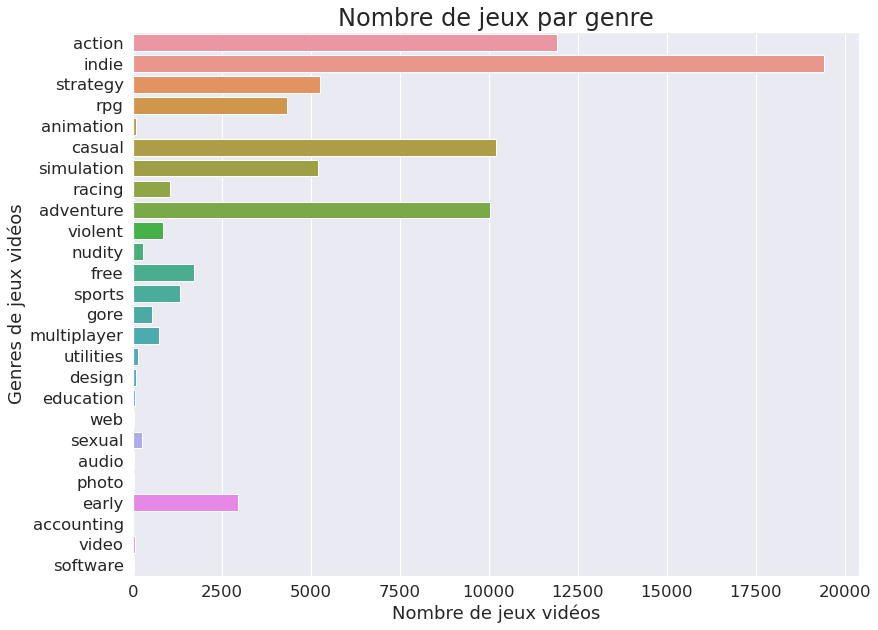

In [139]:
plt.figure(figsize=(13, 10))
# Bar chart
sns.set(font_scale=1.5) #taille du texte
sns.barplot(x=list_genre_count, y=genreLabels)
plt.xlabel("Nombre de jeux vidéos")
plt.ylabel("Genres de jeux vidéos")
sns.set(font_scale=2)
plt.title("Nombre de jeux par genre")

## Fin visualisation
(↓ Le code en bas ne marchera pas car j'ai décommencé toutes les fonctions liées à la librairie "nltk" (tokenize etc...)

### Ensembles d'entraînement et de test

In [18]:
# on choisit d'utiliser 10000 jeux du dataset (sélectionnés aléatoirement) avec X_tokkenized et en ne prenant que le 1er label
X1, y1 = select_data(X_tokkenized, y_first, 10000)

# tokkenized est à True car on utilise X_tokkenized
remove_genres(X1, y1, tokkenized=True)

In [19]:
seed = 7
# pourcentage du dataset utilisé pour l'ensemble de test
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_ratio, train_size=1-test_ratio,
                                                    random_state=seed)

print('X_train: ',X_train.shape,'\ny_train: ',y_train.shape,'\n\nX_test: ',X_test.shape,'\ny_test: ',y_test.shape)
print("\nL'ensemble d'entraînement possède des jeux de ",len(get_labels(y_train)), " classes différentes")

X_train:  (7000, 3) 
y_train:  (7000,) 

X_test:  (3000, 3) 
y_test:  (3000,)

L'ensemble d'entraînement possède des jeux de  23  classes différentes


In [20]:
X_train, y_train

(array([[list(['shadow', 'call', 'random', 'dungeon', 'game', 'players', 'style', 'weapons', 'leave', 'hand', 'skills', 'slot', 'arm', 'fight', 'style', 'variety', 'equipment', 'combine', 'aggressive', 'style', 'fight', 'plot', 'base', 'plot', 'dark', 'fantasy', 'genre', 'plot', 'experience', 'carefully', 'craft', 'dark', 'story', 'challenge', 'mode', 'gameplay', 'ordinary', 'plot', 'mode', 'players', 'arrive', 'random', 'distance', 'random', 'room', 'room', 'handle', 'equipment', 'dangerous', 'trap', 'cunning', 'monsters', 'cover', 'unknown', 'game', 'stag', 'development', 'update', 'lead', 'experience', 'personal', 'development']),
         list(['shadow', 'call', 'random', 'dungeon', 'game', 'players', 'style', 'weapons', 'leave', 'hand', 'skills', 'slot', 'arm', 'fight', 'style', 'variety', 'equipment', 'combine', 'aggressive', 'style', 'fight', 'plot', 'base', 'plot', 'dark', 'fantasy', 'genre', 'plot', 'experience', 'carefully', 'craft', 'dark', 'story', 'challenge', 'mode', 'gam